In [2]:
from Learning_Agent import *
from GPUCB import *
from GPTS import *
from GPTS_TS import *
from GPUCB1_TS import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Class import *
import Plots as p
import warnings
warnings.filterwarnings("ignore")  # Convergence warning concerning the parameters of the GP since we are working with very large values


In [3]:
pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)


In [4]:
cl=Class()



env=Enviroment(5,100,cl)

In [5]:
runs=10
T=365
show_print=False

cum_regret_gpucb_multi=[]
cum_reward_gpucb_multi=[]
istant_regret_gpucb_multi=[]
istant_reward_gpucb_multi=[]




for r in range(runs):

    gpucb=GPUCB1_TS(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPUCB=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPUCB=[]

    regret_GPUCB=np.zeros(T)+expected_optimal_rew

    reward_GPUCB=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPUCB=gpucb.pull_arm()
        price=pulled_arm_GPUCB[0]
        bid=pulled_arm_GPUCB[1]
        rewards_GPUCB=env.round(price, bid)
        gpucb.update(price, bid ,rewards_GPUCB )

        cum_reward_GPUCB.append(cum_reward_GPUCB[t]+rewards_GPUCB[3])
        cum_regret_GPUCB.append(cumulative_optimal_rew[t+1]-cum_reward_GPUCB[t+1])
        regret_GPUCB[t]=regret_GPUCB[t]-rewards_GPUCB[3]
        reward_GPUCB.append(rewards_GPUCB[3])
        
       # print(opt_bid,pulled_arm_GPUCB)



  

    cum_regret_gpucb_multi.append(cum_regret_GPUCB)
    cum_reward_gpucb_multi.append(cum_reward_GPUCB)
    istant_regret_gpucb_multi.append(regret_GPUCB)
    istant_reward_gpucb_multi.append(reward_GPUCB)

 

In [6]:
runs=10
T=365
show_print=False

cum_regret_gpts_multi=[]
cum_reward_gpts_multi=[]
istant_regret_gpts_multi=[]
istant_reward_gpts_multi=[]




for r in range(runs):

    gpts=GPTS_TS(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPTS=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPTS=[]

    regret_GPTS=np.zeros(T)+expected_optimal_rew

    reward_GPTS=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPTS=gpts.pull_arm()
        price=pulled_arm_GPTS[0]
        bid=pulled_arm_GPTS[1]
        rewards_GPTS=env.round(price, bid)
        gpts.update(price, bid ,rewards_GPTS )

        cum_reward_GPTS.append(cum_reward_GPTS[t]+rewards_GPTS[3])
        cum_regret_GPTS.append(cumulative_optimal_rew[t+1]-cum_reward_GPTS[t+1])
        regret_GPTS[t]=regret_GPTS[t]-rewards_GPTS[3]
        reward_GPTS.append(rewards_GPTS[3])
        
        #print(opt_bid,pulled_arm_GPTS)



  

    cum_regret_gpts_multi.append(cum_regret_GPTS)
    cum_reward_gpts_multi.append(cum_reward_GPTS)
    istant_regret_gpts_multi.append(regret_GPTS)
    istant_reward_gpts_multi.append(reward_GPTS)

 

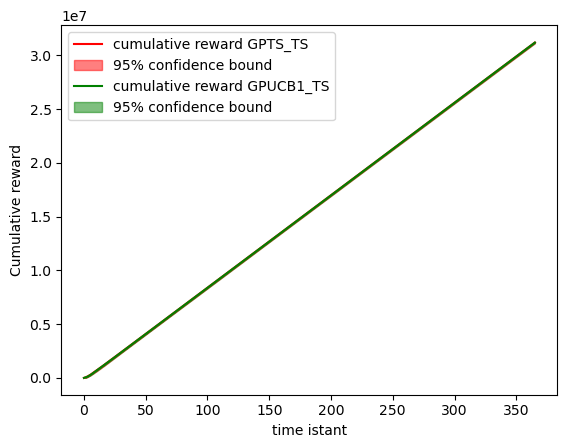

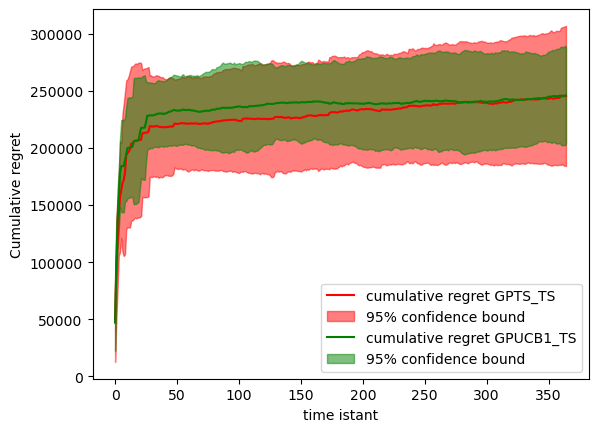

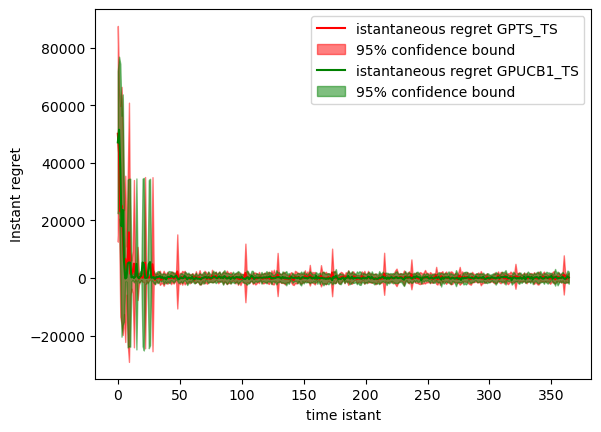

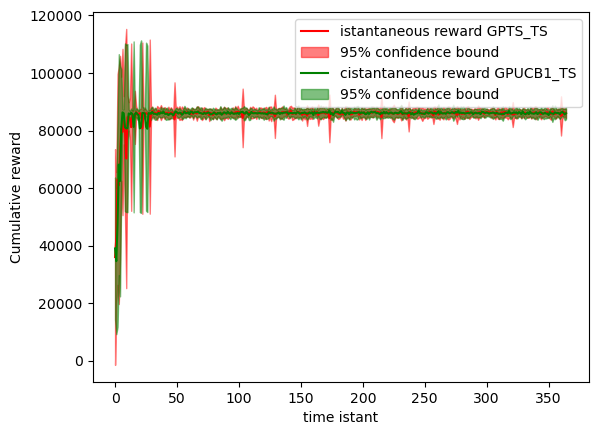

In [7]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpts_multi)
arr2=np.array(cum_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative reward GPTS_TS", "cumulative reward GPUCB1_TS","Cumulative reward")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpts_multi)
arr2=np.array(cum_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative regret GPTS_TS", "cumulative regret GPUCB1_TS","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpts_multi)
arr2=np.array(istant_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous regret GPTS_TS", "istantaneous regret GPUCB1_TS","Instant regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpts_multi)
arr2=np.array(istant_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous reward GPTS_TS", "cistantaneous reward GPUCB1_TS","Cumulative reward")

